# Environmental Reef Tabular Dataset

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Dataset Analysis : General

### Loading the DF

In [6]:

df = pd.read_csv("/home/lucia/code/Lucia-Cordero/08-ReefSight-Project/01-Raw-data/global_bleaching_environmental.csv", low_memory=False)
df

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.1630,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.5750,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.3690,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.7600,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.7690,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41356,15446,10310562,Reef_Check,-8.3651,116.0844,Pacific,116.5.3.9E.8.21.54.4S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2.09,1.49,9,0.63,2019-05-28,nd,nd,nd
41357,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2,1.29,8.01,0.65,2019-05-16,nd,nd,nd
41358,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2,1.29,8.01,0.65,2019-05-16,nd,nd,nd
41359,15457,10310536,Reef_Check,-8.3445,116.0629,Pacific,116.3.46.548E.8.20.40.236S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2,1.29,8.01,0.65,2019-05-29,nd,nd,nd


### DF essentials: shape, description, column names 

In [7]:
df.shape

(41361, 62)

<font color='green'>**Conclusion:** The dataframe is made of 41k rows, 62 columns </font> 

In [8]:
df.columns

Index(['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees',
       'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name',
       'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name',
       'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year',
       'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Freq

Percent of null values in the DF

In [9]:
df.isnull().sum().sum() / df.size * 100

0.0

In [10]:
null_summary = pd.DataFrame({
    "null_count": df.isna().sum(),
    "null_percent": df.isna().mean() * 100
})

null_summary.sort_values("null_percent", ascending=False)

,null_count,null_percent
Site_ID,0,0.0
TSA_Standard_Deviation,0,0.0
SSTA_Standard_Deviation,0,0.0
SSTA_Mean,0,0.0
SSTA_Minimum,0,0.0
...,...,...
ClimSST,0,0.0
Temperature_Kelvin,0,0.0
Temperature_Mean,0,0.0
Temperature_Minimum,0,0.0


<font color='green'>**Conclusion:** 20% of null values in the whole DF;  16% in the percent bleaching column! </font> 

### Displaying selected columns of the DF

In [11]:
columns_to_show = ["Site_ID", "Date", "Ocean_Name", "Ecoregion_Name", "Country_Name","Distance_to_Shore", "Depth_m", "Exposure",
       "Turbidity", "Temperature_Kelvin", "Percent_Bleaching"]
df_chosen_cols = df[columns_to_show]
df_chosen_cols

,Site_ID,Date,Ocean_Name,Ecoregion_Name,Country_Name,Distance_to_Shore,Depth_m,Exposure,Turbidity,Temperature_Kelvin,Percent_Bleaching
0,2501,2005-09-15,Atlantic,Cuba and Cayman Islands,Cuba,8519.23,10,Exposed,0.0287,302.05,50.2
1,3467,1991-03-15,Pacific,Society Islands French Polynesia,French Polynesia,1431.62,14,Exposed,0.0262,303.30,50.7
2,1794,2006-01-15,Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,182.33,7,Exposed,0.0429,299.18,50.9
3,8647,2006-04-15,Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,313.13,9.02,Exposed,0.0424,299.61,50.9
4,8648,2006-04-15,Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,792,12.50,Exposed,0.0424,299.7,50.9
...,...,...,...,...,...,...,...,...,...,...,...
41356,15446,2019-05-28,Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,91.31,5.6,Sheltered,0.0372,301.85,nd
41357,15456,2019-05-16,Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,129.08,3.5,Sheltered,0.0849,302.51,nd
41358,15456,2019-05-16,Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,129.08,3.5,Sheltered,0.0849,302.51,nd
41359,15457,2019-05-29,Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,209.17,7.8,Sheltered,0.0849,301.07,nd


### Distribution of y: 'Percent Bleaching'

In [12]:
df["Percent_Bleaching"] = pd.to_numeric(
    df["Percent_Bleaching"],
    errors="coerce"
)

In [13]:
df["Percent_Bleaching"].value_counts()

Percent_Bleaching
0.00     16629
5.50      1184
75.00      914
0.25       882
1.00       705
         ...  
6.13         1
6.11         1
6.09         1
5.98         1
97.22        1
Name: count, Length: 2240, dtype: int64

<Axes: ylabel='Frequency'>

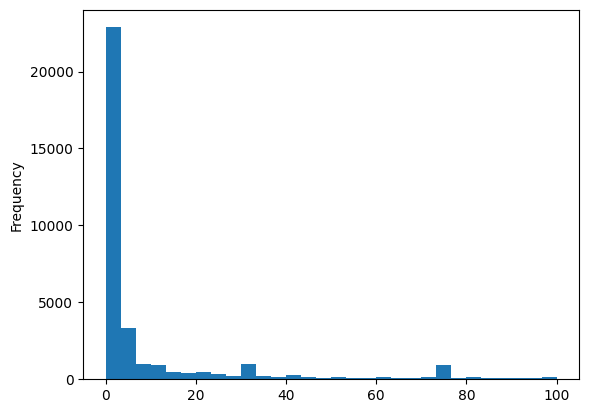

In [14]:
df["Percent_Bleaching"].plot(kind='hist', bins=30)

In [15]:
sites_healthy = df[df["Percent_Bleaching"] == 0]
sites_healthy

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
1860,4608,9625,Kumagai,24.4571,124.0986,Pacific,nd,Central Indo-Pacific,South Ryukyu Islands Japan,Japan,...,6,1,0,1.44,8.23,0.52,2010-06-29,nd,nd,nd
1861,4615,9632,Kumagai,24.7998,125.1786,Pacific,nd,Central Indo-Pacific,South Ryukyu Islands Japan,Japan,...,7.75,1,0,1.27,10.08,0.41,2010-06-02,nd,nd,nd
1862,4618,9635,Kumagai,26.2476,127.6682,Pacific,nd,Central Indo-Pacific,North Ryukyu Islands Japan,Japan,...,7,0,0,1.3,10.39,0.37,2009-08-23,nd,nd,nd
1863,4621,9638,Kumagai,26.2752,127.7141,Pacific,nd,Central Indo-Pacific,North Ryukyu Islands Japan,Japan,...,8,0.67,0,1.51,13.06,0.42,2009-07-18,nd,nd,nd
1864,4623,9640,Kumagai,26.4435,127.7727,Pacific,nd,Central Indo-Pacific,North Ryukyu Islands Japan,Japan,...,9,0,0,1.31,13.2,0.39,2010-08-21,nd,nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23255,1473,10320954,Reef_Check,16.0952,-88.2917,Atlantic,88.17.504W.16.5.714N,Tropical Atlantic,Belize and west Caribbean,Belize,...,10,2,0,1.81,13.04,0.83,2009-05-07,nd,nd,nd
23256,3726,10320561,Reef_Check,15.9538,-86.4736,Atlantic,86.28.419W.15.57.230N,Tropical Atlantic,Belize and west Caribbean,Honduras,...,9,1,0,1.65,10.43,0.65,2009-03-12,nd,nd,nd
23257,3726,10320561,Reef_Check,15.9538,-86.4736,Atlantic,86.28.419W.15.57.230N,Tropical Atlantic,Belize and west Caribbean,Honduras,...,9,1,0,1.65,10.43,0.65,2009-03-12,nd,nd,nd
23258,5726,10310781,Reef_Check,6.5139,117.9243,Pacific,117.55.459E.6.30.834N,Central Indo-Pacific,Sulu Sea,Malaysia,...,11,2,2.73,1.55,9.52,0.81,2019-10-16,nd,nd,nd


In [16]:
len(sites_healthy)/len(df)*100

40.20454050917531

<font color='green'>**Conclusion:** 40% of reefs are healthy (0% bleaching)</font> 


### Exploring multi-year data

Converting column to datetime + extract year

In [17]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

In [18]:
sites_multi_year = (
    df.groupby("Site_ID")["Year"]
      .nunique()
      .reset_index()
)

sites_multi_year = sites_multi_year[sites_multi_year["Year"] > 1]

sites_multi_year

,Site_ID,Year
1,2,7
3,4,7
5,6,4
6,7,2
7,8,4
...,...,...
12597,999940,2
12610,999953,2
12641,999986,2
12657,1000003,2


Filter original DF to multi-year sites

<font color='green'>**Conclusion:** 2086 sites are multi-year sites</font> 


In [19]:
multi_year_site_ids = sites_multi_year["Site_ID"]

df_multi_year_only = df[df["Site_ID"].isin(multi_year_site_ids)]

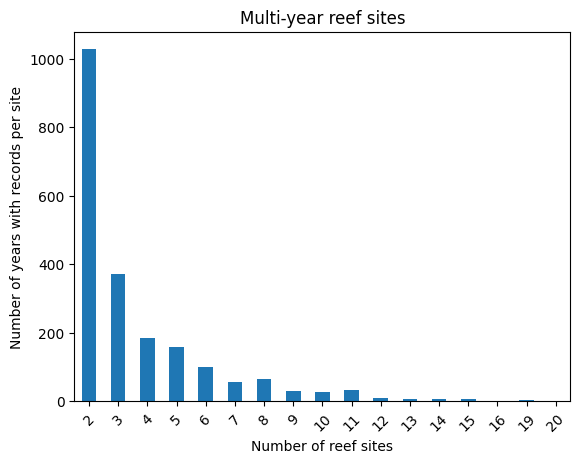

In [20]:
sites_multi_year["Year"].value_counts().sort_index().plot(kind='bar')
plt.title("Multi-year reef sites")
plt.ylabel("Number of years with records per site")
plt.xlabel("Number of reef sites")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)  

plt.show()

<font color='green'>**Conclusion:** Majority of multi-year sites (~50%) only have observations for 2 years</font> 


## Exploratory Dataset Analysis : Great Barrier Reef

In [21]:
df_filtered_gbr = df_chosen_cols[
    (df_chosen_cols["Country_Name"] == "Australia") &
    (df_chosen_cols["Ecoregion_Name"].str.contains("Great Barrier Reef", case=False, na=False))
]
df_filtered_gbr

,Site_ID,Date,Ocean_Name,Ecoregion_Name,Country_Name,Distance_to_Shore,Depth_m,Exposure,Turbidity,Temperature_Kelvin,Percent_Bleaching
9,499,1998-03-15,Pacific,Central and northern Great Barrier Reef,Australia,2750.37,nd,Sheltered,0.2197,302.41,51.53
42,886,1998-04-15,Pacific,Central and northern Great Barrier Reef,Australia,1608.47,nd,Sheltered,0.07,300.77,53.35
61,121,1998-03-15,Pacific,Central and northern Great Barrier Reef,Australia,275.04,5,Sheltered,0.1919,302.37,55
227,500,1998-03-15,Pacific,Central and northern Great Barrier Reef,Australia,163.79,nd,Exposed,0.0661,301.49,62.05
291,29,2002-01-15,Pacific,Southern Great Barrier Reef,Australia,989.12,5.5,Sheltered,0.0731,300.94,65
...,...,...,...,...,...,...,...,...,...,...,...
35360,1074,2007-07-15,Pacific,Central and northern Great Barrier Reef,Australia,809.41,5,Sheltered,0.2173,294.39,nd
35361,1074,2007-07-15,Pacific,Central and northern Great Barrier Reef,Australia,809.41,5,Sheltered,0.2173,294.39,nd
35362,1164,2007-12-15,Pacific,Southern Great Barrier Reef,Australia,8406.82,nd,Exposed,0.0746,nd,nd
41343,9795,1998-03-15,Pacific,Central and northern Great Barrier Reef,Australia,21.14,2.6,Sheltered,0.0822,nd,nd


<font color='green'>**Conclusion:** 2K entries for the Great Barrier Reef </font> 
